In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,timedelta,datetime

In [2]:
driver = webdriver.Firefox(executable_path=r'geckodriver.exe')

<ipython-input-2-8d9f540fd2e0>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'geckodriver.exe')


In [3]:

lluvia_diaria = pd.DataFrame(columns=['fecha_registro','probalidad_lluvia','precipitacion','fecha_pronostico'])
fecha = date.today()
for dia in range(1,91):
    driver.get(f"https://www.accuweather.com/es/cl/santiago/60449/daily-weather-forecast/60449?day={dia}")
    content = driver.page_source
    soup = BeautifulSoup(content)
    tabla = soup.find_all('p', {'class': 'panel-item'})
    for i in tabla:
        value = i.get_text(separator=",").split(",")
        if value[0] == "Probabilidad de precipitación":
            probabilidad = float(value[1].replace("%", ""))/100
        if value[0] == "Precipitaciones":
            precipitaciones = float(value[1].replace("mm", ""))
            break
    fecha_pronostico = fecha+timedelta(days=(dia-1))
    lluvia_diaria.loc[len(lluvia_diaria)] = [fecha, probabilidad,precipitaciones, fecha_pronostico]
lluvia_diaria.to_csv(f'data\lluvia_diaria_{fecha}_{datetime.now().hour}.csv',sep=";",decimal=",",index=False)


In [4]:
lluvia_diaria_23 = pd.read_csv('data/lluvia_diaria_2022-05-23.csv',sep=";",decimal=",")
lluvia_diaria_24 = pd.read_csv('data/lluvia_diaria_2022-05-24.csv',sep=";",decimal=",")
lluvia_diaria_25 = pd.read_csv('data/lluvia_diaria_2022-05-25_2.csv',sep=";",decimal=",")
lluvia_diaria_27_11 = pd.read_csv('data/lluvia_diaria_2022-05-27_11.csv',sep=";",decimal=",")
lluvia_diaria_26_15 = pd.read_csv('data/lluvia_diaria_2022-05-26_15.csv',sep=";",decimal=",")
lluvia_diaria_28_22 = pd.read_csv('data/lluvia_diaria_2022-05-28_22.csv',sep=";",decimal=",")
lluvia_diaria_29_9 = pd.read_csv('data/lluvia_diaria_2022-05-29_15.csv',sep=";",decimal=",")
lluvia_diaria_30_8 = pd.read_csv('data/lluvia_diaria_2022-05-30_8.csv',sep=";",decimal=",")
lluvia_diaria_31_9 = pd.read_csv('data/lluvia_diaria_2022-05-31_9.csv',sep=";",decimal=",")
lluvia_diaria_06_01 = pd.read_csv('data/lluvia_diaria_2022-06-01_9.csv',sep=";",decimal=",")
lluvia_diaria_06_02 = pd.read_csv('data/lluvia_diaria_2022-06-02_10.csv',sep=";",decimal=",")
lluvia_diaria_06_03 = pd.read_csv('data/lluvia_diaria_2022-06-03_12.csv',sep=";",decimal=",")
lluvia_diaria_06_04 = pd.read_csv('data/lluvia_diaria_2022-06-04_13.csv',sep=";",decimal=",")
lluvia_diaria_06_07 = pd.read_csv('data/lluvia_diaria_2022-06-07_9.csv',sep=";",decimal=",")
lluvia_diaria_06_11 = pd.read_csv('data/lluvia_diaria_2022-06-11_23.csv',sep=";",decimal=",")
lluvia_diaria_06_12 = pd.read_csv('data/lluvia_diaria_2022-06-12_10.csv',sep=";",decimal=",")
lluvia_diaria_06_14 = pd.read_csv('data/lluvia_diaria_2022-06-14_8.csv',sep=";",decimal=",")


In [16]:
for df in [lluvia_diaria_23,lluvia_diaria_24,lluvia_diaria_25,lluvia_diaria_26_15,lluvia_diaria_27_11,
lluvia_diaria_28_22,lluvia_diaria_29_9,lluvia_diaria_30_8,lluvia_diaria_31_9,lluvia_diaria_06_01,lluvia_diaria_06_02,lluvia_diaria_06_03,
lluvia_diaria_06_04,lluvia_diaria_06_07,lluvia_diaria_06_11,lluvia_diaria_06_12,lluvia_diaria_06_14]:
    df['lluvia_esperada'] = df['probalidad_lluvia']*df['precipitacion']
    df['acumulado'] = df['lluvia_esperada'].cumsum()



In [17]:
lluvia_esperada_total = pd.concat([lluvia_diaria_23,lluvia_diaria_24,lluvia_diaria_25,lluvia_diaria_26_15,lluvia_diaria_27_11,
lluvia_diaria_28_22,lluvia_diaria_29_9,lluvia_diaria_30_8,lluvia_diaria_31_9,lluvia_diaria_06_01,lluvia_diaria_06_02,lluvia_diaria_06_03,
lluvia_diaria_06_04,lluvia_diaria_06_07,lluvia_diaria_06_11,lluvia_diaria_06_12,lluvia_diaria_06_14])
lluvia_esperada_total.reset_index(drop=True,inplace=True)
#lluvia_esperada_total['lluvia_esperada'] = lluvia_esperada_total['probalidad_lluvia']*lluvia_esperada_total['precipitacion']


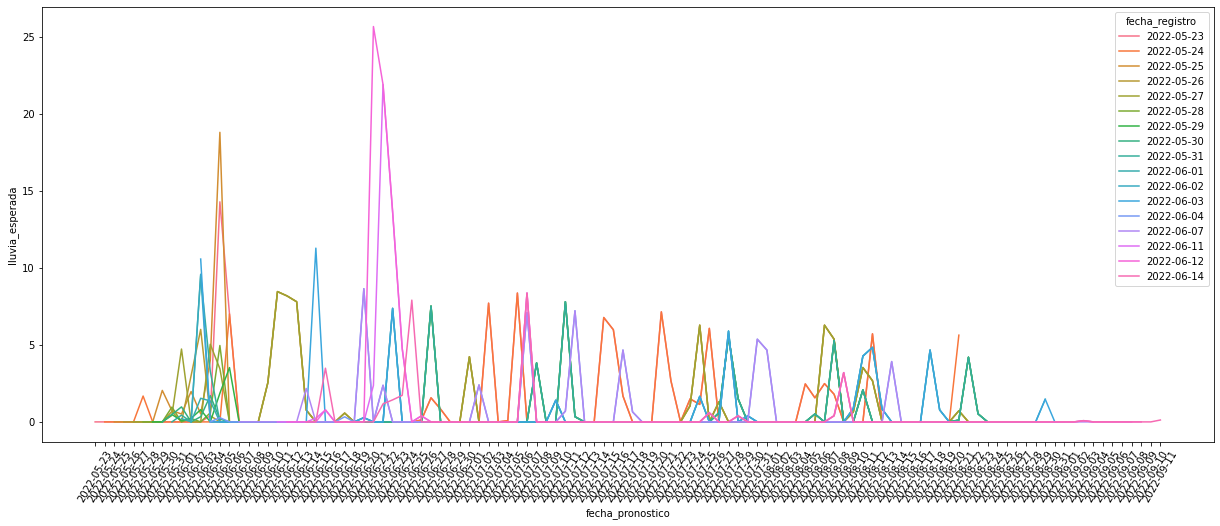

In [18]:
plt.figure(figsize = (21,8))
ax = sns.lineplot(data=lluvia_esperada_total, x='fecha_pronostico',y='lluvia_esperada',hue='fecha_registro')
plt.xticks(rotation=60)
plt.show()

In [19]:
lluvia_real = pd.DataFrame(
    {'fecha':
     ["2022-05-23", "2022-05-24", "2022-05-25", "2022-05-26", "2022-05-27",
         "2022-05-28", "2022-05-29", "2022-05-30", "2022-05-31","2022-06-01","2022-06-02","2022-06-03","2022-06-04","2022-06-05","2022-06-06",
         "2022-06-07","2022-06-08","2022-06-09","2022-06-10","2022-06-11","2022-06-12","2022-06-13", ],
     'lluvia_330114':
     [0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0,2.5,0.0,7.0,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.0,0.2,0.2],
     'lluvia_330020':
     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,3.3,0.0,6.8,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,],
     'lluvia_330019':
     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,4.5,0.0,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,],
     'lluvia_330021':
     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,1.7,0.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]

     })
lluvia_real['lluvia_promedio'] = lluvia_real.mean(axis=1)
lluvia_real['acumulado_real']  = lluvia_real['lluvia_promedio'].cumsum()
lluvia_real


<ipython-input-19-9dfbaa07f670>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lluvia_real['lluvia_promedio'] = lluvia_real.mean(axis=1)


,fecha,lluvia_330114,lluvia_330020,lluvia_330019,lluvia_330021,lluvia_promedio,acumulado_real
0,2022-05-23,0.0,0.0,0.0,0.0,0.000,0.000
1,2022-05-24,0.0,0.0,0.0,0.0,0.000,0.000
2,2022-05-25,0.0,0.0,0.0,0.0,0.000,0.000
3,2022-05-26,0.1,0.0,0.0,0.0,0.025,0.025
4,2022-05-27,0.0,0.0,0.0,0.0,0.000,0.025
5,2022-05-28,0.0,0.0,0.0,0.0,0.000,0.025
6,2022-05-29,0.0,0.0,0.0,0.0,0.000,0.025
7,2022-05-30,0.0,0.0,0.0,0.0,0.000,0.025
8,2022-05-31,0.0,0.0,0.0,0.0,0.000,0.025
9,2022-06-01,2.5,3.3,4.5,1.7,3.000,3.025


In [20]:
lluvia_esperada_total

,fecha_registro,probalidad_lluvia,precipitacion,fecha_pronostico,lluvia_esperada,acumulado
0,2022-05-23,0.15,0.0,2022-05-23,0.000,0.000
1,2022-05-23,0.25,0.0,2022-05-24,0.000,0.000
2,2022-05-23,0.04,0.0,2022-05-25,0.000,0.000
3,2022-05-23,0.04,0.0,2022-05-26,0.000,0.000
4,2022-05-23,0.08,0.0,2022-05-27,0.000,0.000
...,...,...,...,...,...,...
1525,2022-06-14,0.02,0.0,2022-09-07,0.000,28.741
1526,2022-06-14,0.01,0.0,2022-09-08,0.000,28.741
1527,2022-06-14,0.00,0.0,2022-09-09,0.000,28.741
1528,2022-06-14,0.00,0.0,2022-09-10,0.000,28.741


In [21]:
lluvia_esperada_total = lluvia_esperada_total.merge(lluvia_real, left_on='fecha_pronostico',right_on='fecha', how='left')
lluvia_esperada_total

,fecha_registro,probalidad_lluvia,precipitacion,fecha_pronostico,lluvia_esperada,acumulado,fecha,lluvia_330114,lluvia_330020,lluvia_330019,lluvia_330021,lluvia_promedio,acumulado_real
0,2022-05-23,0.15,0.0,2022-05-23,0.000,0.000,2022-05-23,0.0,0.0,0.0,0.0,0.000,0.000
1,2022-05-23,0.25,0.0,2022-05-24,0.000,0.000,2022-05-24,0.0,0.0,0.0,0.0,0.000,0.000
2,2022-05-23,0.04,0.0,2022-05-25,0.000,0.000,2022-05-25,0.0,0.0,0.0,0.0,0.000,0.000
3,2022-05-23,0.04,0.0,2022-05-26,0.000,0.000,2022-05-26,0.1,0.0,0.0,0.0,0.025,0.025
4,2022-05-23,0.08,0.0,2022-05-27,0.000,0.000,2022-05-27,0.0,0.0,0.0,0.0,0.000,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,2022-06-14,0.02,0.0,2022-09-07,0.000,28.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526,2022-06-14,0.01,0.0,2022-09-08,0.000,28.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,2022-06-14,0.00,0.0,2022-09-09,0.000,28.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,2022-06-14,0.00,0.0,2022-09-10,0.000,28.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


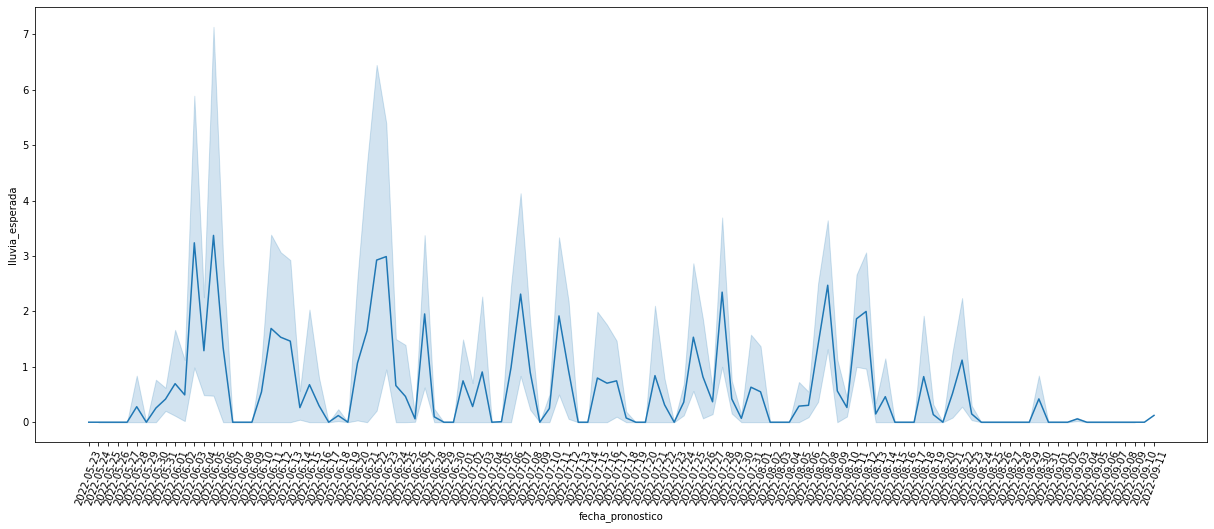

In [22]:
plt.figure(figsize = (21,8))
ax = sns.lineplot(data=lluvia_esperada_total, x="fecha_pronostico", y="lluvia_esperada")
plt.xticks(rotation=70)
plt.show()

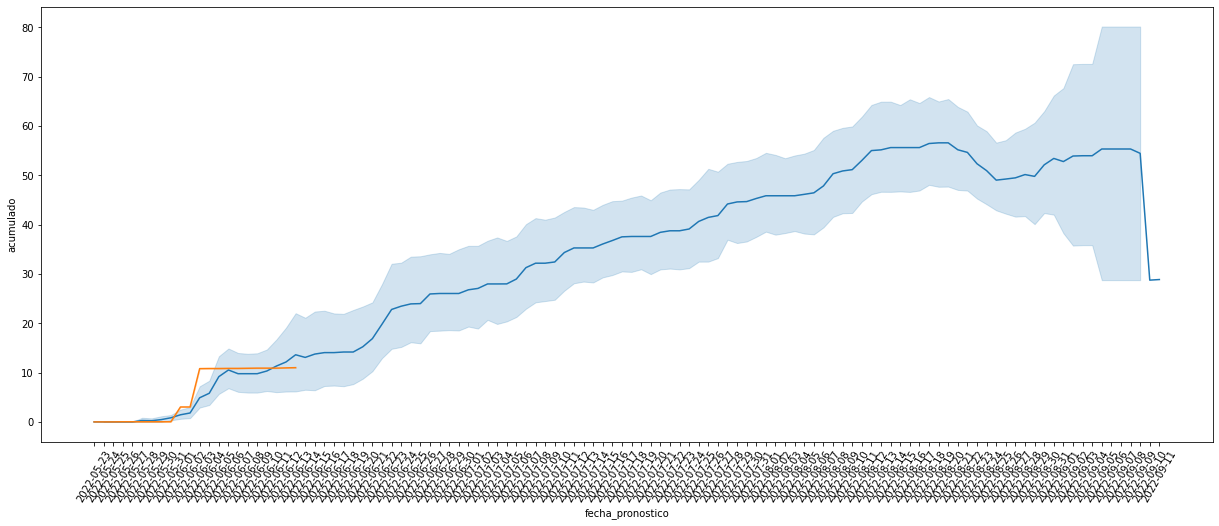

In [23]:
plt.figure(figsize = (21,8))
ax = sns.lineplot(data=lluvia_esperada_total, x="fecha_pronostico", y="acumulado")
ax = sns.lineplot(data=lluvia_esperada_total, x="fecha_pronostico", y="acumulado_real")
plt.xticks(rotation=60)
plt.show()
